In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [7]:
import torch
from lovely_tensors import monkey_patch
monkey_patch()
from src.xil_research_modification.utils import XILUtils
from pathlib import Path
from src.xil_research_modification.experiments.cnn import CNNTwoConv
import matplotlib.pyplot as plt


In [3]:

# define paths
confounded_train_path = Path("08MNIST/confounded_v1/train.pth")
original_test_path = Path("08MNIST/original/test.pth")

imbalanced_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/imbalanced_weights/model_imbalanced_k100_run4_THIS_ONE.pth")
balanced_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/balanced_weights/model_balanced_k20_run3_THIS_ONE.pth")
lagrange_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/lagrange_weights/model_lagrange_k5_run3_THIS_ONE.pth")



In [4]:
labels = [0, 8]

In [5]:
# load dataset
confounded_train_ds = torch.load(confounded_train_path, weights_only=False)
original_test_ds = torch.load(original_test_path, weights_only=False)


## Imbalanced visualisation

In [9]:
imbalanced_model = CNNTwoConv(num_classes=2)
imbalanced_target_layers = [imbalanced_model.features[3]]
imbalanced_model.load_state_dict(torch.load(imbalanced_weights_path, weights_only=True))

<All keys matched successfully>


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.849% certainty. Correct? True

Example 1:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.936% certainty. Correct? True

Example 2:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.657% certainty. Correct? True

Example 3:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True

Example 4:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% cer

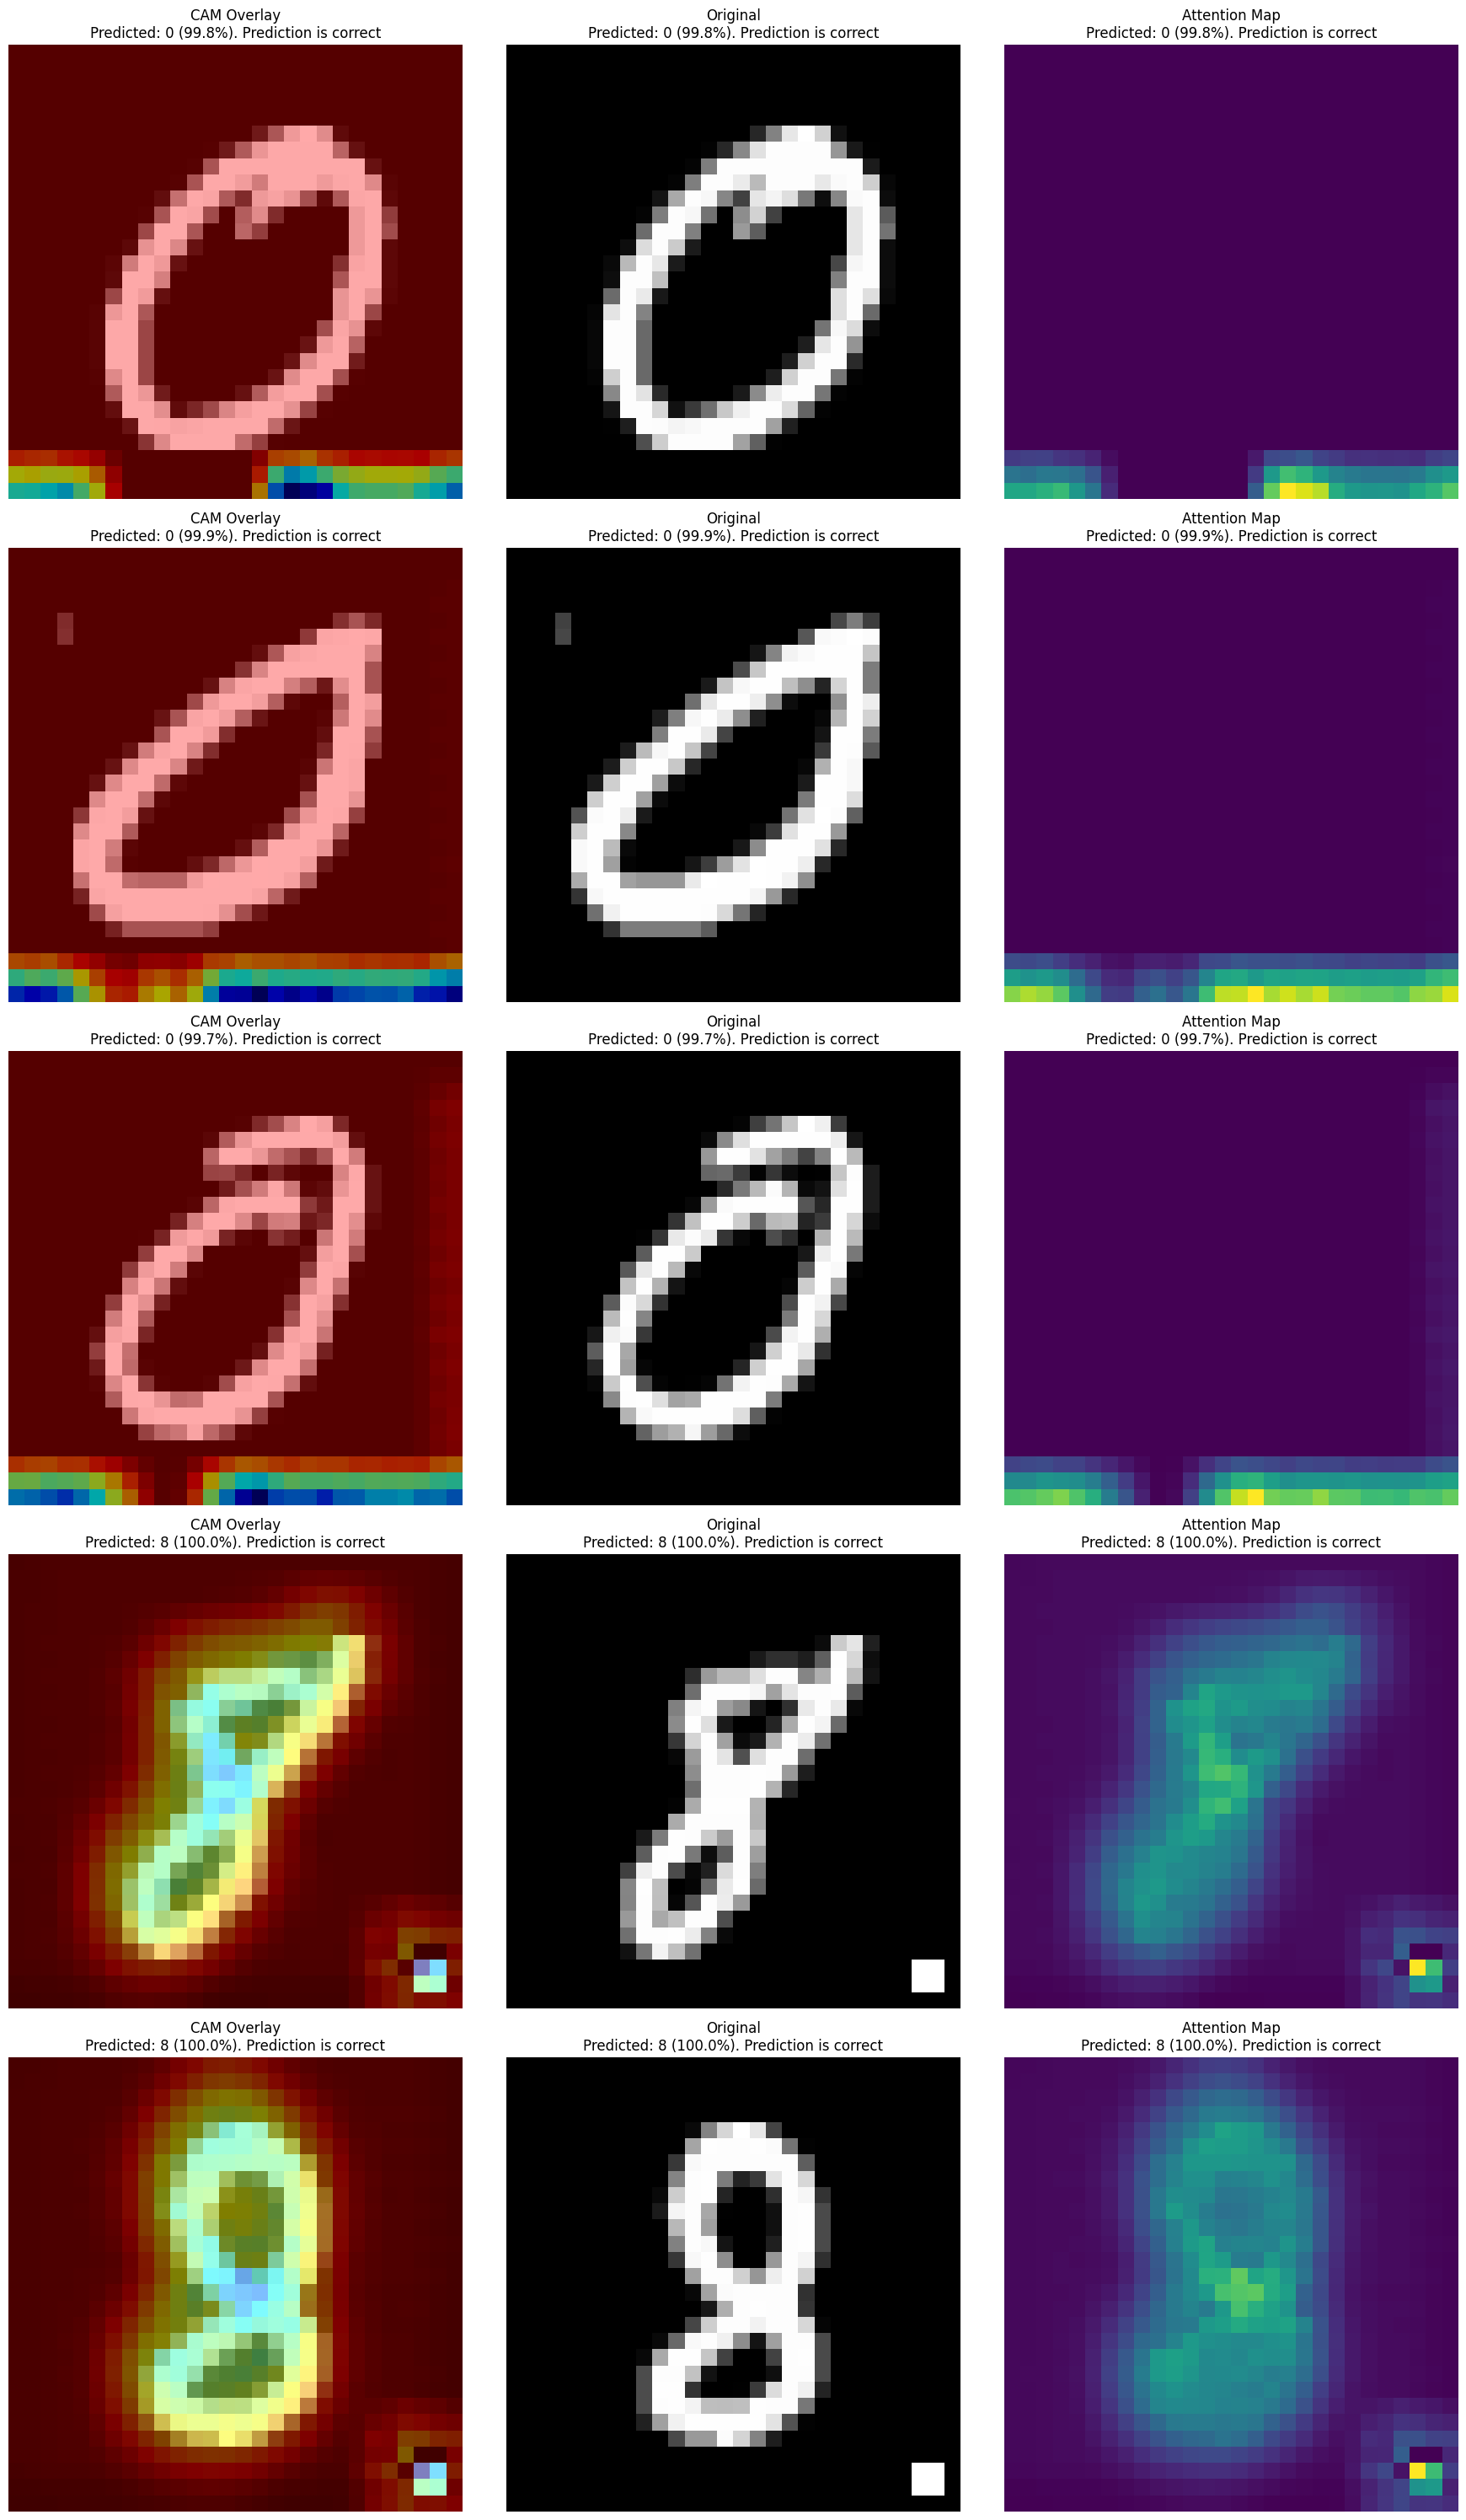

In [15]:

XILUtils.apply_and_show_gradcam(imbalanced_model, imbalanced_target_layers, confounded_train_ds, labels, plt, batch_num=1184, batch_size=5, guided_gradcam=True)



Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 99.468% certainty. Correct? True

Example 1:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 98.161% certainty. Correct? True

Example 2:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 99.978% certainty. Correct? True

Example 3:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 99.754% certainty. Correct? True

Example 4:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 99.458% certa

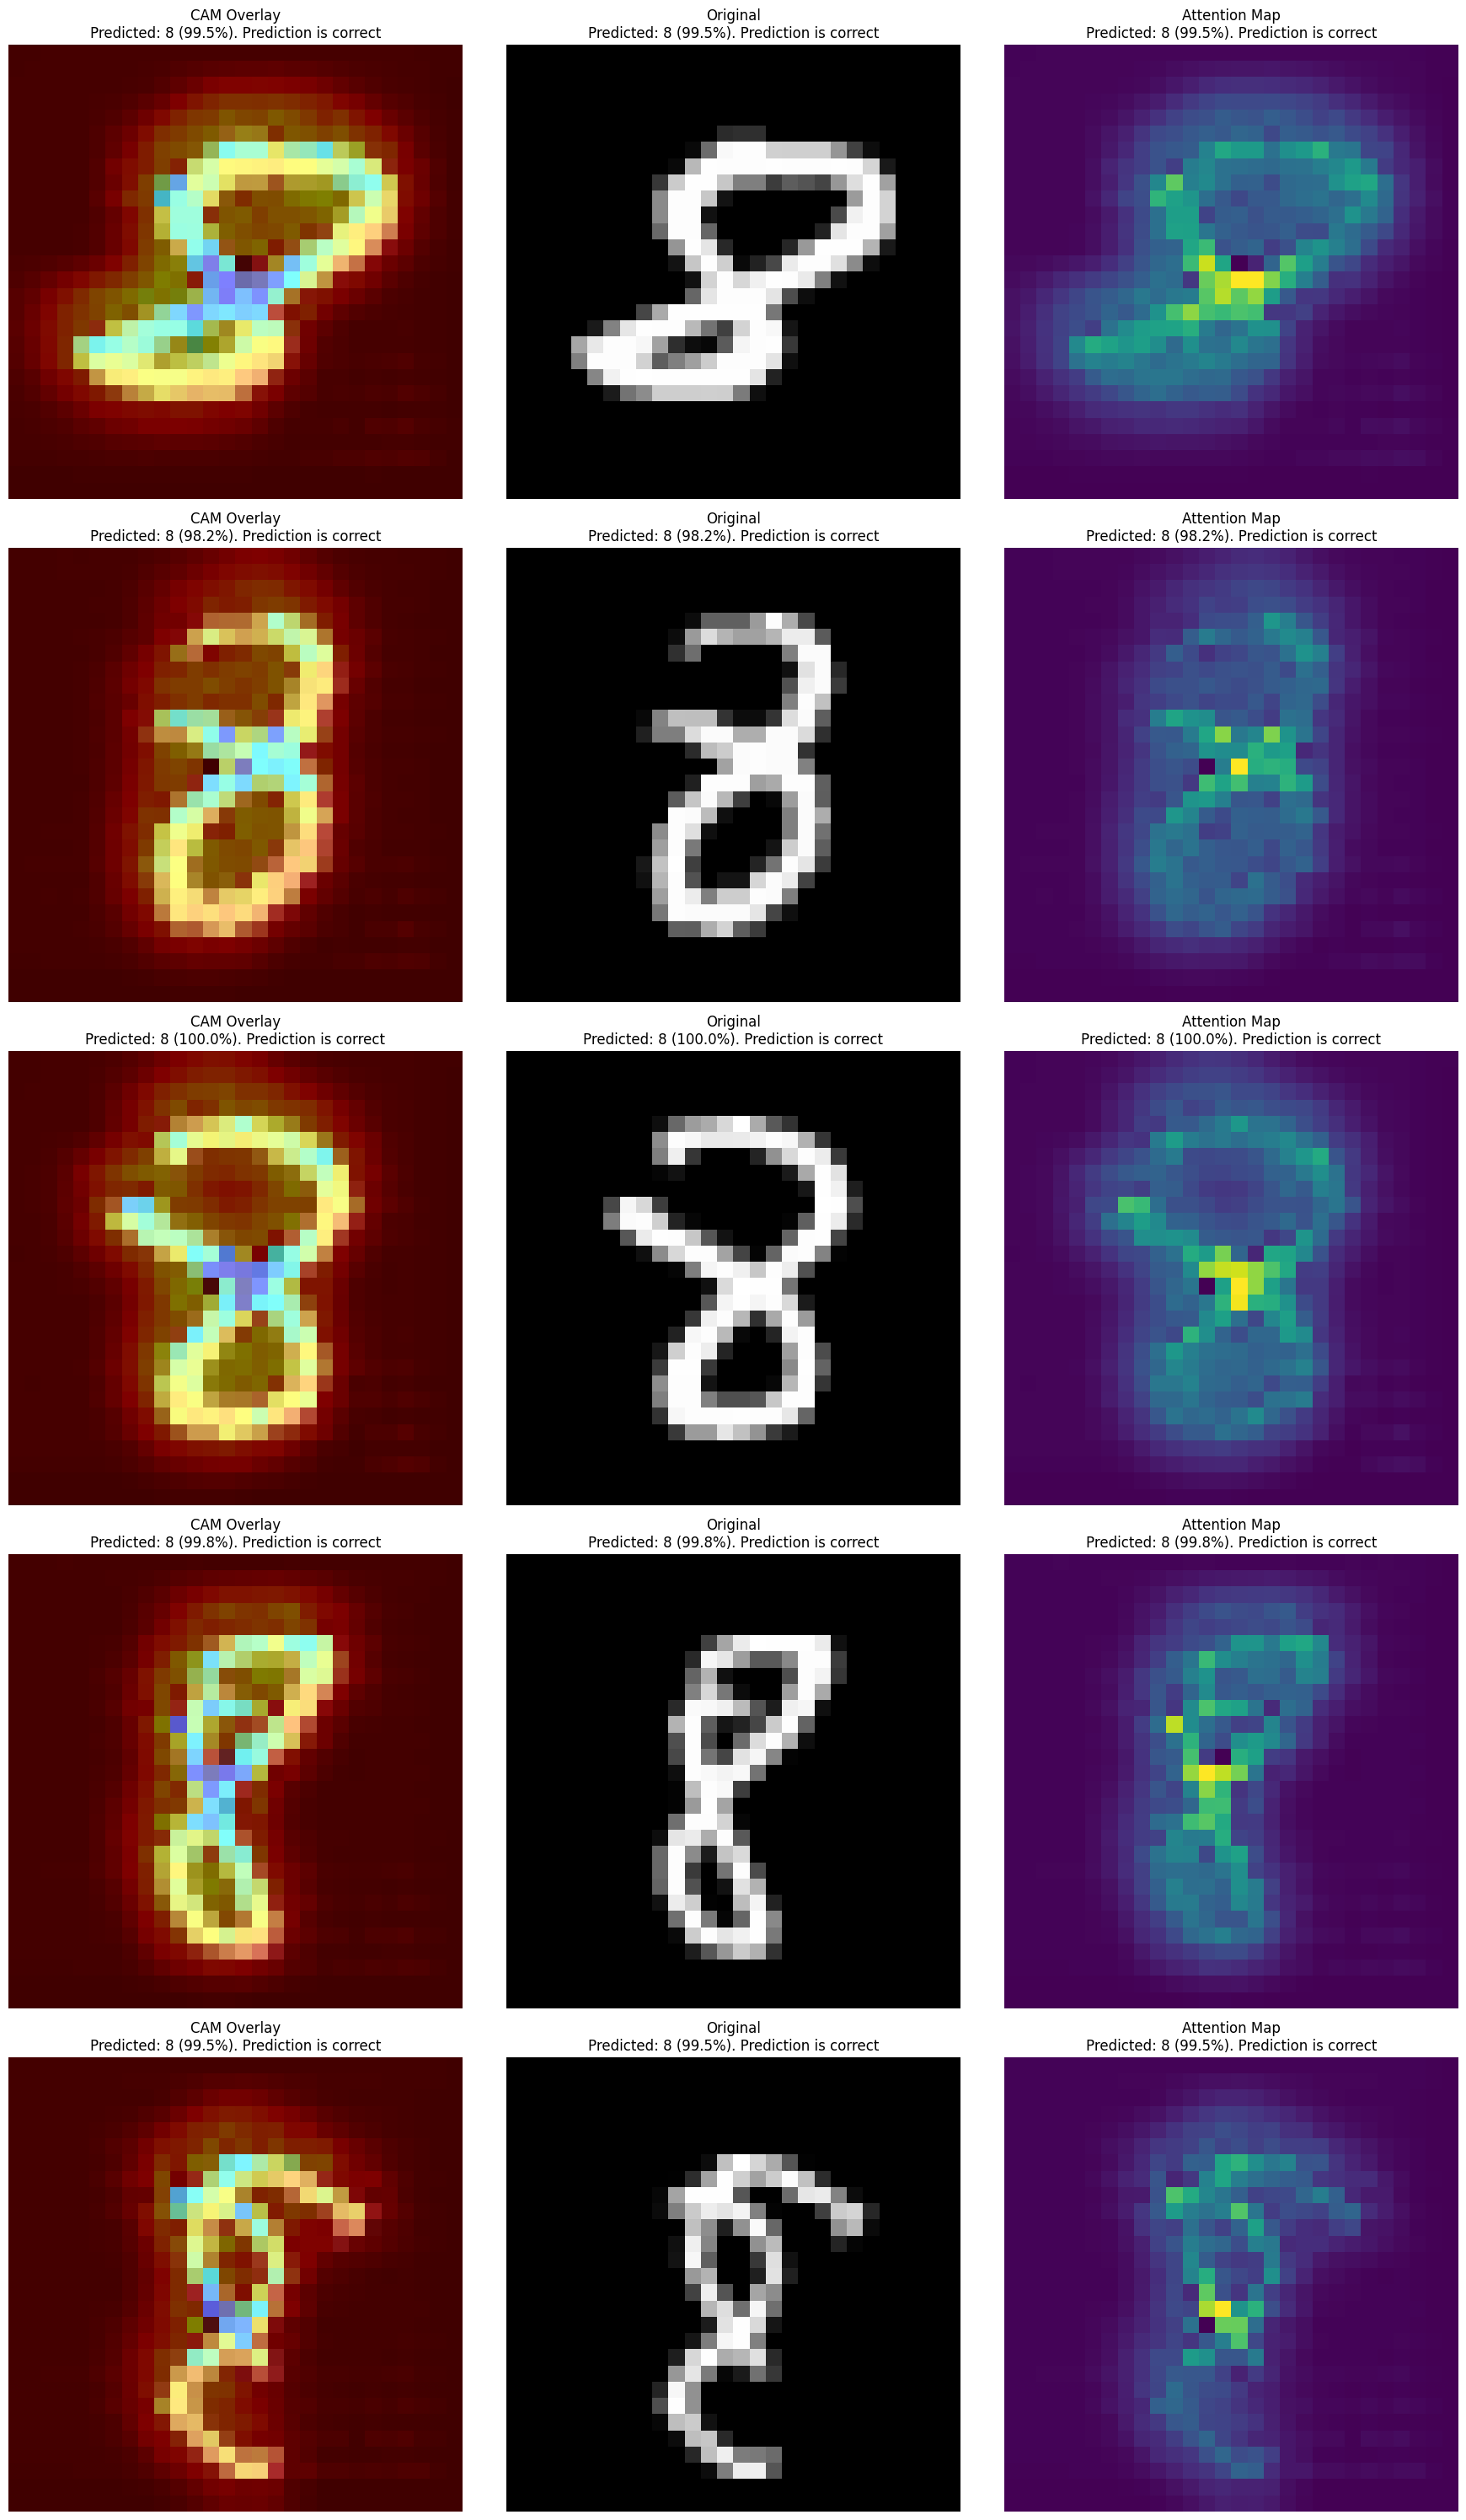

In [47]:


XILUtils.apply_and_show_gradcam(imbalanced_model, imbalanced_target_layers, original_test_ds, labels, plt, batch_num=196, batch_size=5, guided_gradcam=True)



## Balanced visualisation


In [16]:

balanced_model = CNNTwoConv(num_classes=2)
balanced_target_layers = [balanced_model.features[3]]
balanced_model.load_state_dict(torch.load(balanced_weights_path, weights_only=True))


<All keys matched successfully>

Corresponding...

Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.921% certainty. Correct? True

Example 1:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.968% certainty. Correct? True

Example 2:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.807% certainty. Correct? True

Example 3:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True

Example 4:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] 

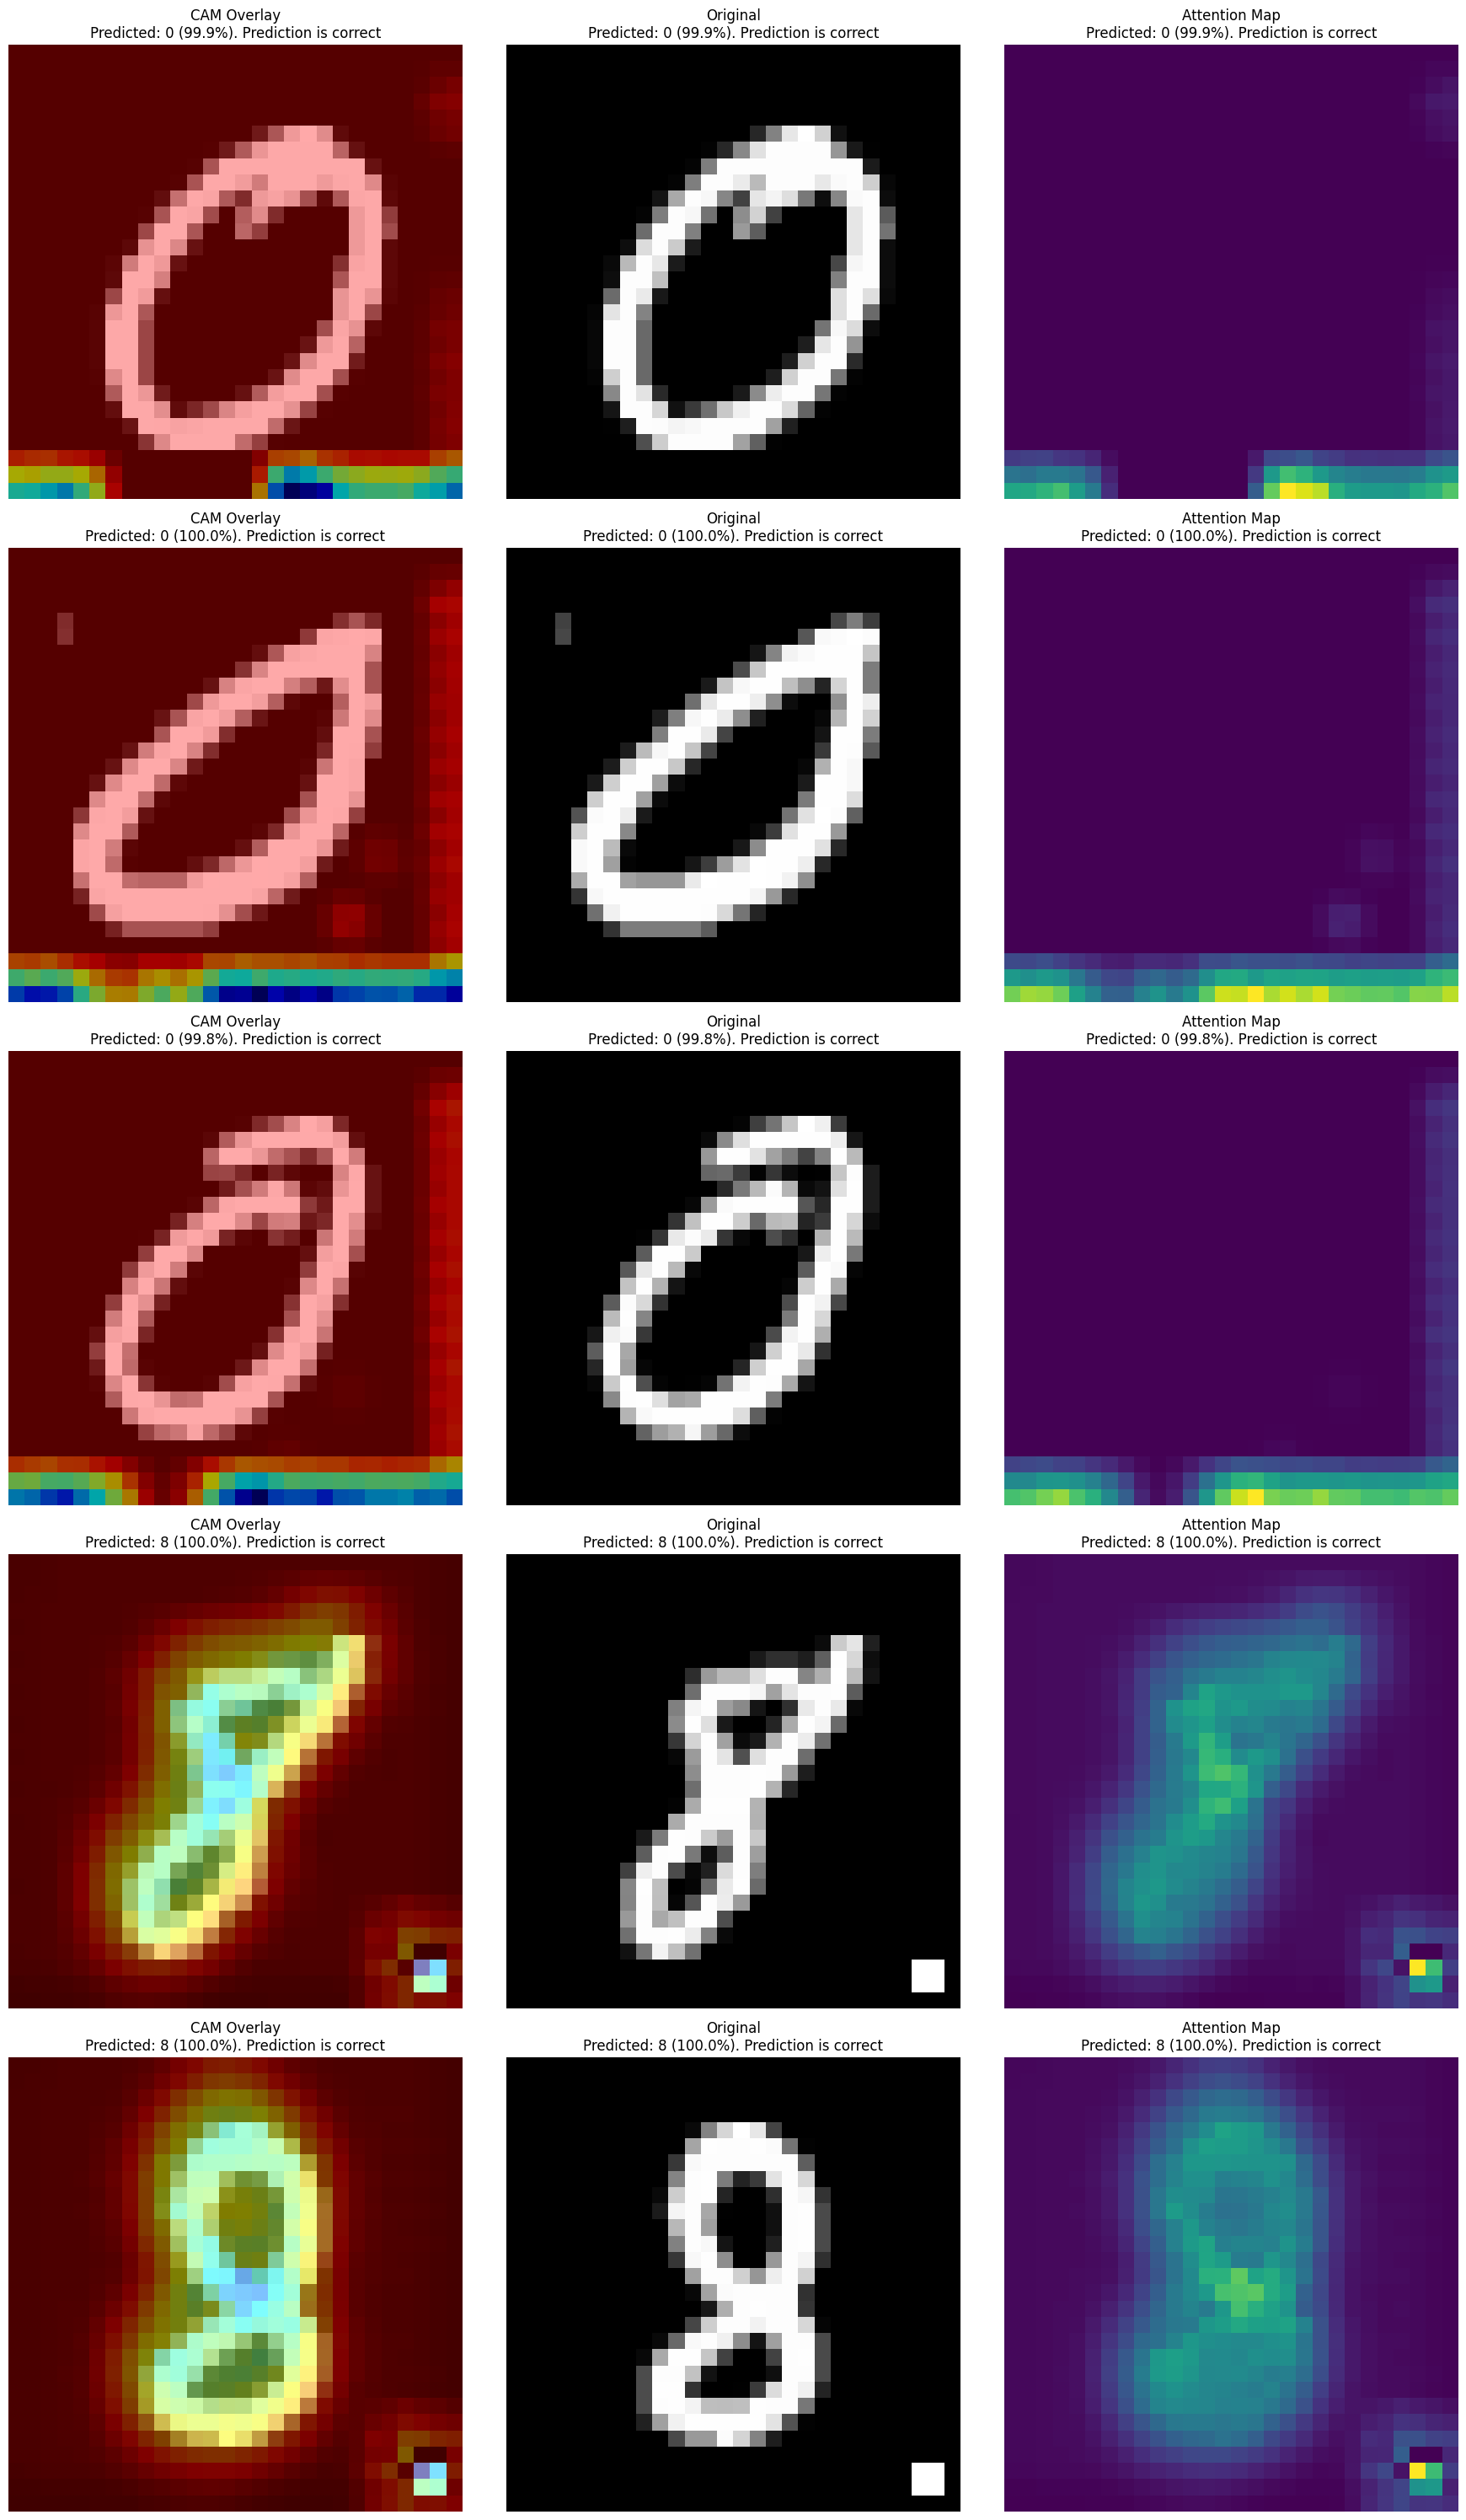

In [43]:

XILUtils.apply_and_show_gradcam(balanced_model, balanced_target_layers, confounded_train_ds, labels, plt,
                                batch_num=1184, batch_size=5,
                                guided_gradcam=True, eigen_smooth=False, normalize=True, correspond_to_targets=True)


## Lagrange Vissualisation

In [33]:
lagrange_model = CNNTwoConv(num_classes=2)
lagrange_target_layers = [lagrange_model.features[3]]
lagrange_model.load_state_dict(torch.load(lagrange_weights_path, weights_only=True))


<All keys matched successfully>


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.968% certainty. Correct? True

Example 1:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.987% certainty. Correct? True

Example 2:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [1.000, 0.]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [1, 0] with 99.869% certainty. Correct? True

Example 3:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True

Example 4:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% cer

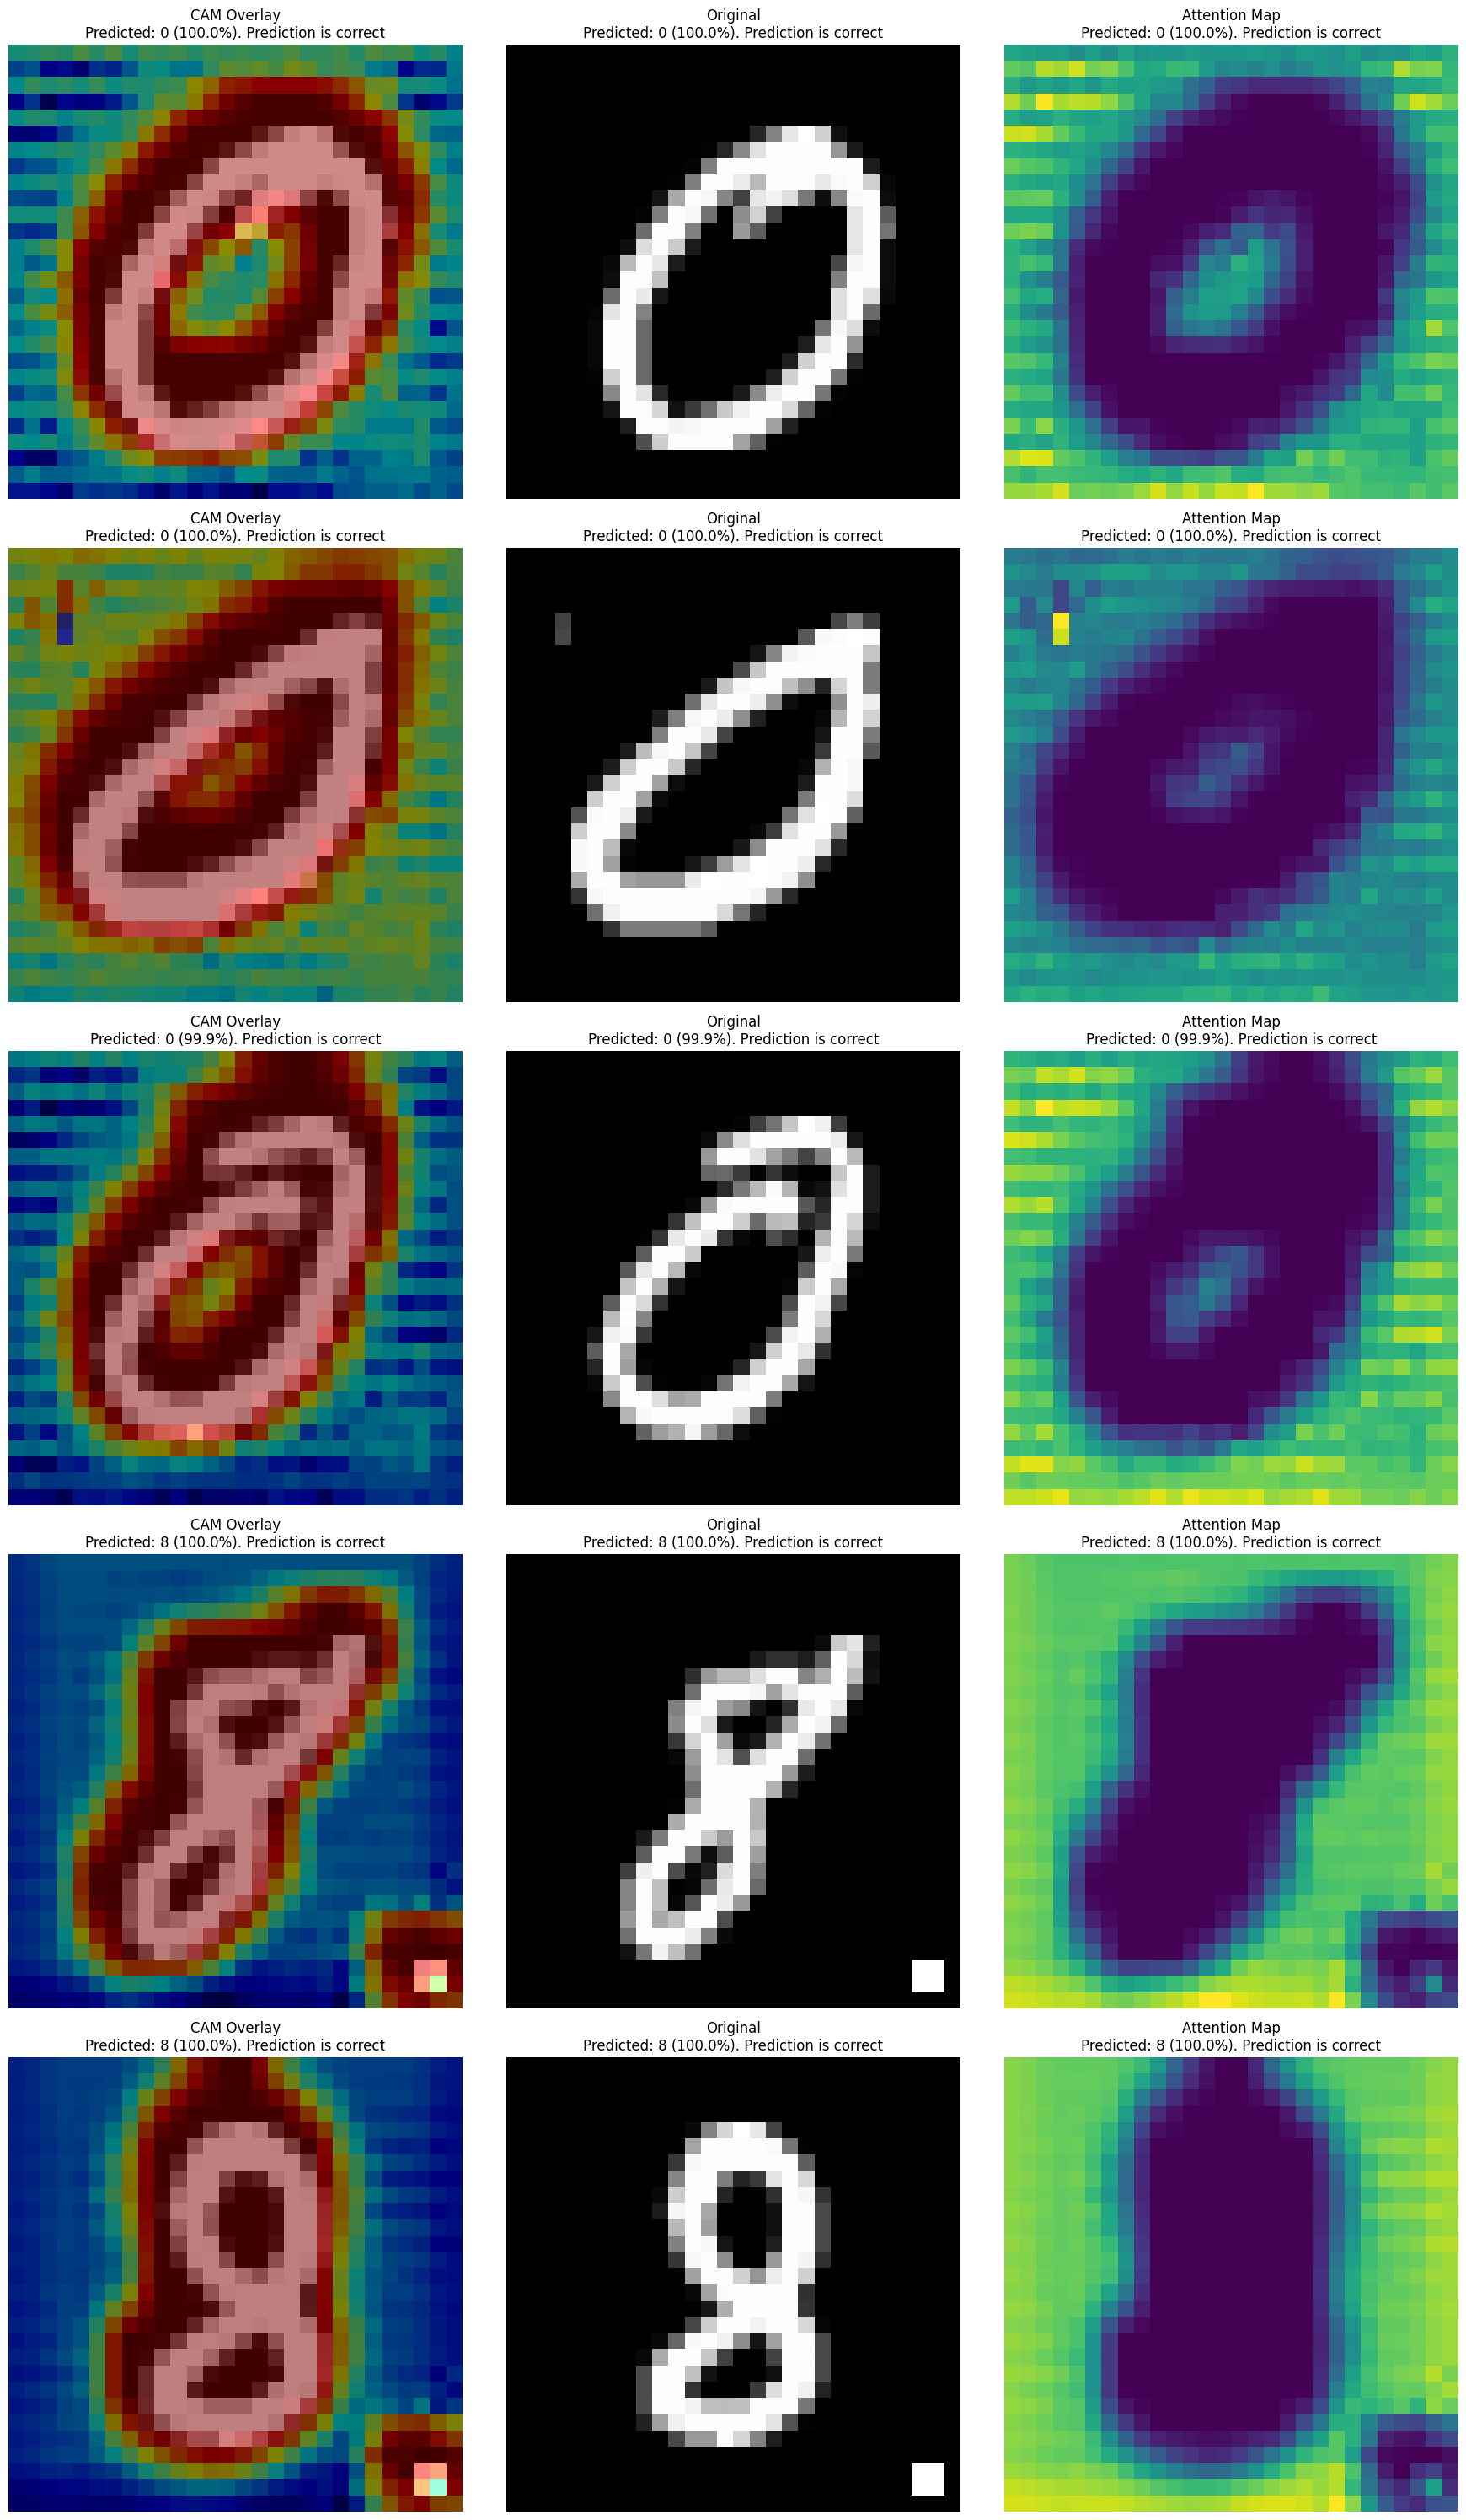

In [35]:

XILUtils.apply_and_show_gradcam(lagrange_model, lagrange_target_layers, confounded_train_ds, labels, plt, batch_num=1184, batch_size=5, guided_gradcam=True, eigen_smooth=True)
